Importamos las librerias

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_classification

Creamos un dataset artificial

(1000, 1)


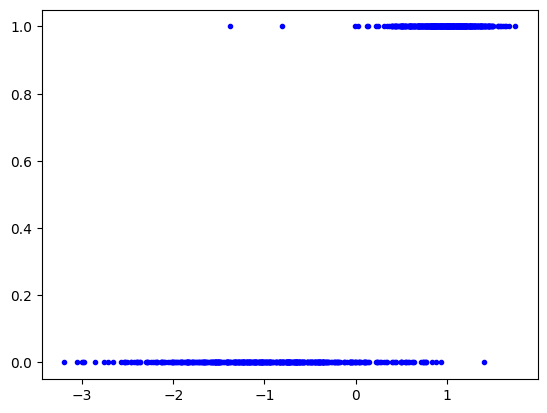

In [44]:
X, y = make_classification(n_samples=1000, n_classes=2,n_clusters_per_class=1, n_features=1,n_informative=1, n_redundant=0, n_repeated=0, random_state=200)
print(X.shape)
plt.figure()
plt.plot(X[:,0],y,"b.")

In [45]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1337)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(670, 1)
(670,)
(330, 1)
(330,)


Construir nuestras funciones
https://towardsdatascience.com/coding-logistic-regression-from-scratch-d18b4fbfca8a



In [46]:
sigmoid = lambda z: 1/(1 + np.exp(-z))

La @ indica multiplicación de matrices

In [47]:
def cost_function(x, y, coeficientes):
	h = sigmoid(x@coeficientes)
	#print(np.log(h).shape)
	one = np.ones((y.shape[0],1))
	return (-((y.T@np.log(h)) + (one-y).T@np.log(one - h))/(y.shape[0])) # Es la última función del ppt 18

In [48]:
def gradient_descent(x, y, coeficientes, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []

	for _ in range(num_epochs):
		h_x = sigmoid(x@coeficientes)
		derivada = (1/m)*(x.T@(h_x - y))
		coeficientes = coeficientes - (learning_rate)*derivada
		J_all.append(cost_function(x, y, coeficientes))

	return coeficientes, J_all

In [49]:
def predict_class(prob):
	if(prob >= 0.5):
		return 1
	else:
		return 0

In [50]:
def predict(theta, x):
	return float(sigmoid(x@theta))

Cargamos la data

In [51]:
coeficientes = np.zeros((X_train.shape[1], 1))
learning_rate = 0.1
num_epochs = 200

y = np.reshape(y_train, (y_train.shape[0], 1))
x = X_train


coeficientes, J_all = gradient_descent(x, y, coeficientes, learning_rate, num_epochs)
J = cost_function(x, y, coeficientes)

print(coeficientes)
print(J)

[[2.51349398]]
[[0.19395985]]


In [52]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

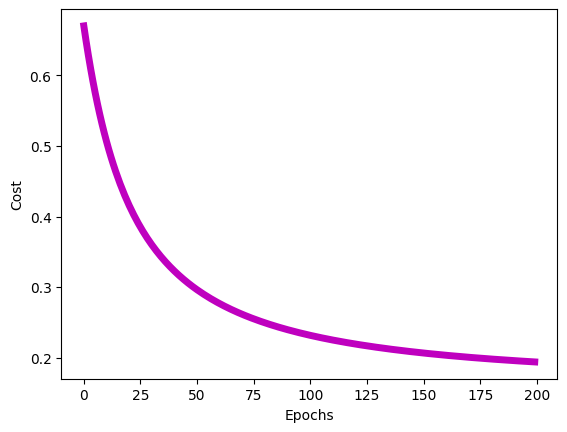

In [53]:
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

(1000, 1)
(1, 1)
(1000, 1)


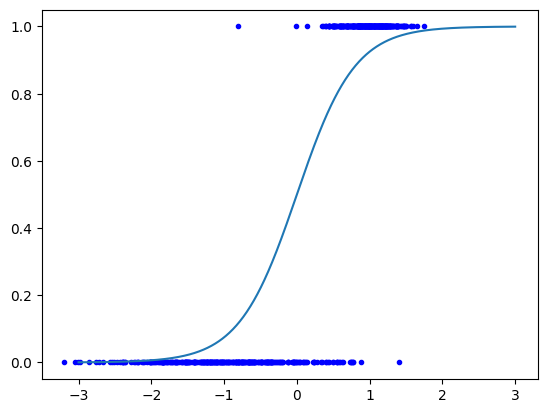

In [54]:
x0 = np.linspace(-3,3,1000)
x0 = x0.reshape(x0.shape[0],1)
print(x0.shape)
print(coeficientes.shape)
y0 = sigmoid(x0@coeficientes)
print(y0.shape)


plt.figure()
plt.plot(X_train,y_train,"b.")
plt.plot(x0,y0)

Ahora usemos sklearn



In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_classification

In [56]:
X, y = make_classification(n_samples=1000, n_classes=2,n_clusters_per_class=1, n_features=1,n_informative=1, n_redundant=0, n_repeated=0, random_state=200)
print(X.shape)

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1337)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(1000, 1)
(670, 1)
(670,)
(330, 1)
(330,)


In [57]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X_train,y_train)
print(modelo.score(X_train,y_train))
print(modelo.coef_)

0.9611940298507463
[[4.81876307]]


In [58]:
x0 = np.linspace(-3,3,1000)
x0 = x0.reshape(x0.shape[0],1)
y0 = modelo.predict(x0)

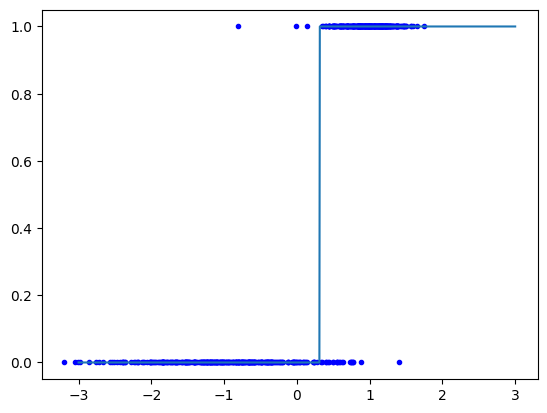

In [59]:
plt.figure()
plt.plot(X_train,y_train,"b.")
plt.plot(x0,y0)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, modelo.predict(X_train))


array([[317,  23],
       [  3, 327]])

MNIST

In [61]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache=False)


KeyboardInterrupt: 

In [ ]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

In [ ]:
X /= 255.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)

In [ ]:
plot_example(X_train, y_train)

In [ ]:
modelo_mnist = LogisticRegression()
modelo_mnist.fit(X_train,y_train)
print(modelo_mnist.score(X_train,y_train))
print(modelo_mnist.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9372
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
cf= confusion_matrix(y_train, modelo_mnist.predict(X_train))

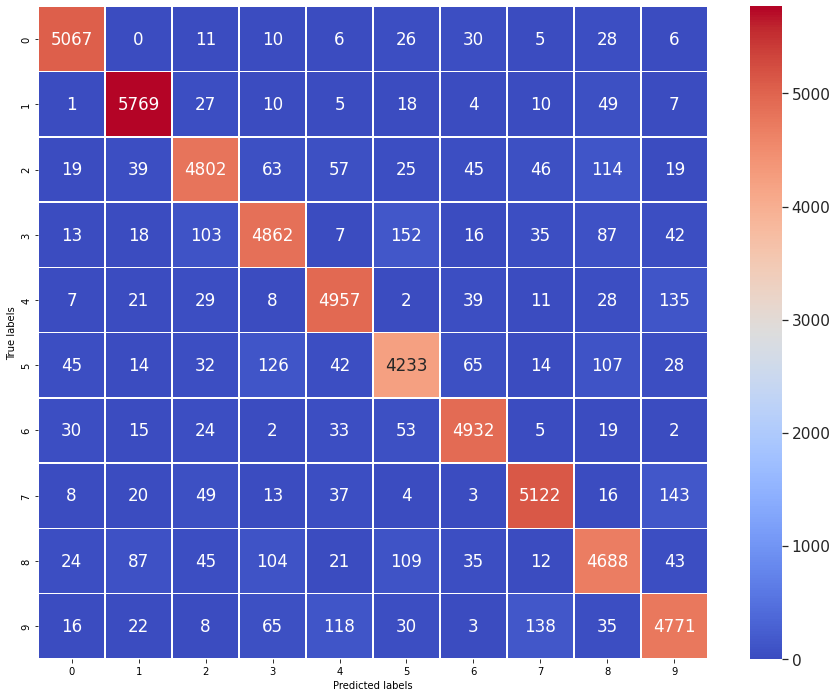

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,12)) 
sns.set(font_scale=1.4)
ax=sns.heatmap(cf, annot=True,linewidths=.5,fmt='g',cmap = "coolwarm")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax